![mobydick](mobydick.jpg)

In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

In [124]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Request Moby Dick**
To analyze Moby Dick, we need to get the contents of Moby Dick from somewhere. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

Note that HTML stands for Hypertext Markup Language and is the standard markup language for the web.

To fetch the HTML file with Moby Dick we're going to use the request package to make a GET request for the website, which means we're getting data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into python instead.

In [125]:
# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
moby_text = r.text


# Printing the first 2000 characters in html
print(moby_text[:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

# **Get the text from the HTML**
This HTML is not quite what we want. However, it does contain what we want: the text of Moby Dick. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package BeautifulSoup.

Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called BeautifulSoup. After creating the soup, we can use its .get_text() method to extract the text.

In [126]:
html_soup= BeautifulSoup(moby_text,'html.parser')

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000:34001])

ent me
      from deliberately stepping into the street, and methodically knocking
      people’s hats off—then, I account it high time to get to sea as soon
      as I can. This is my substitute for pistol and ball. With a philosophical
      flourish Cato throws himself upon his sword; I quietly take to the ship.
      There is nothing surprising in this. If they but knew it, almost all men
      in their degree, some time or other, cherish very nearly the same feelings
      towards the ocean with me.
    

      There now is your insular city of the Manhattoes, belted round by wharves
      as Indian isles by coral reefs—commerce surrounds it with her surf.
      Right and left, the streets take you waterward. Its extreme downtown is
      the battery, where that noble mole is washed by waves, and cooled by
      breezes, which a few hours previous were out of sight of land. Look at the
      crowds of water-gazers there.
    

      Circumambulate the city of a dreamy Sabbath afte

# **Extract the words**
We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.

Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use nltk – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

In [127]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']


# **Make the words lowercase**
OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in Moby Dick in which all capital letters have been made lower case.

In [128]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']


# **Load in stop words**
It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as stop words. The package nltk includes a good list of stop words in English that we can use.



In [129]:
# Getting the English stop words from nltk
stop_words = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(stop_words[:8])
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all']
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselve

# **Remove stop words in Moby Dick**
We now want to create a new list with all words in Moby Dick, except those that are stop words (that is, those words listed in sw). One way to get this list is to loop over all elements of words and add each word to a new list if they are not in sw.

In [130]:
# A new list to hold Moby Dick with No Stop words
words_no_stop = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in stop_words:
        words_no_stop.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_no_stop[:5])

['moby', 'dick', 'whale', 'herman', 'melville']


# **We have the answer**
Our original question was:

What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

We are now ready to answer that! Let's create a word frequency distribution plot using nltk.

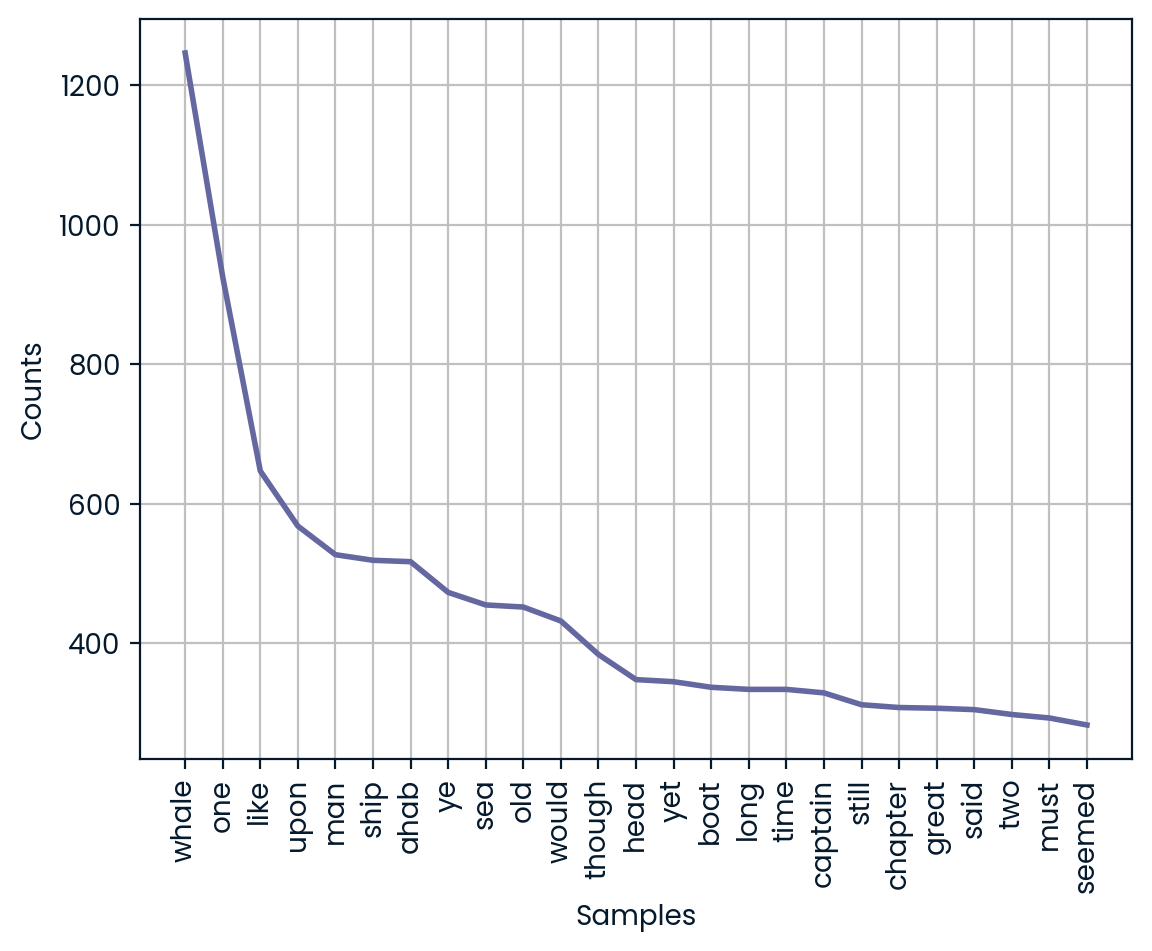

In [131]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)
count=freqdist
top_ten = freqdist.most_common(10)

# **The most common word**
Nice! The frequency distribution plot above is the answer to our question.

The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text.

So, what word turned out to (not surprisingly) be the most common word in Moby Dick?

In [132]:
# What's the most common word in Moby Dick?
most_common_word = 'Whale'